# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [60]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
                                                    # from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



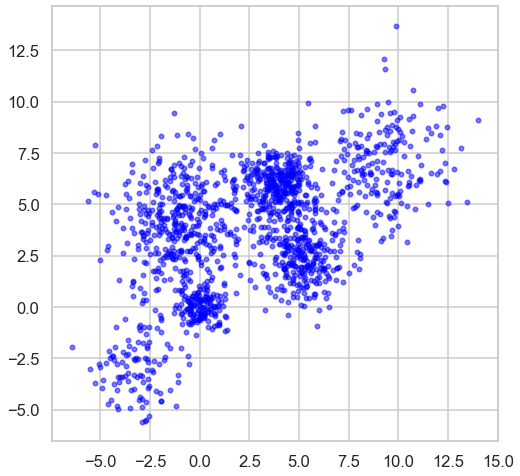

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:

#Kmeans with different values of K
Ks = range(2, 10)
distortions = []
silhouette_scores = []
for k in Ks:
    kmeanModel = KMeans(n_clusters=k).fit(Multi_blob_Data)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        score = silhouette_score(Multi_blob_Data, kmeanModel.labels_, metric='euclidean')
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)






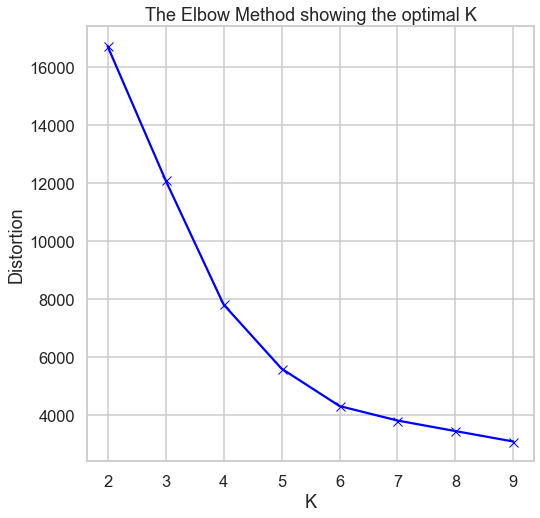

In [6]:
#Display the outcome of each value of K
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

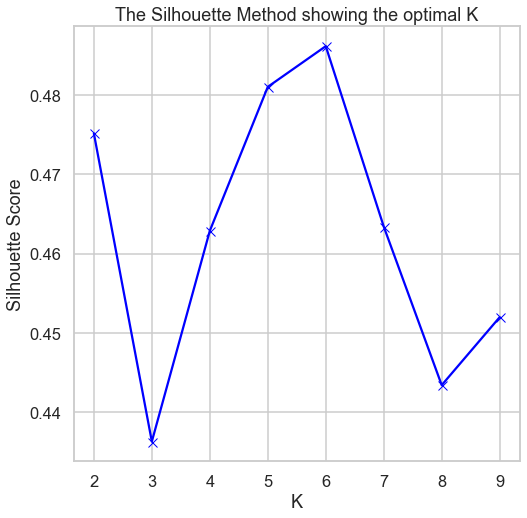

In [7]:

#Plot distortion function versus K and choose the appropriate value of k
plt.plot(Ks, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal K')
plt.show()

In [8]:
#Use the Silhouette Score to choose the best K
best_K = np.argmax(silhouette_scores) + 2
print("The best K is: ", best_K)

#Store the silhouette_score for the best K for later comparison with other clustering techniques
best_silhouette_score = silhouette_scores[best_K-2]
print("The best silhouette score is: ", best_silhouette_score)

The best K is:  6
The best silhouette score is:  0.48614459735646176


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Define parameter grid
param_grid = {'affinity': ['euclidean'],
              'linkage': ['average', 'single'],
              'distance_threshold': [1.0, 1.5, 2.0]}

# Initialize best silhouette score and parameters
best_score = -1
best_params = None


  ,'manhattan',  'cosine' are missing from affinity parameter as it kept messing up the code

Parameters: {'affinity': 'euclidean', 'distance_threshold': 1.0, 'linkage': 'average'}, Silhouette Score: 0.32384977908646284
Parameters: {'affinity': 'euclidean', 'distance_threshold': 1.0, 'linkage': 'single'}, Silhouette Score: -0.14944154607335855
Parameters: {'affinity': 'euclidean', 'distance_threshold': 1.5, 'linkage': 'average'}, Silhouette Score: 0.29558600157934134
Parameters: {'affinity': 'euclidean', 'distance_threshold': 1.5, 'linkage': 'single'}, Silhouette Score: 0.17400752332621522
Parameters: {'affinity': 'euclidean', 'distance_threshold': 2.0, 'linkage': 'average'}, Silhouette Score: 0.31557101720950825
Parameters: {'affinity': 'euclidean', 'distance_threshold': 2.0, 'linkage': 'single'}, Silhouette Score: 0.3218066204847175
The best parameters are:  {'affinity': 'euclidean', 'distance_threshold': 1.0, 'linkage': 'average'}
The best silhouette score is:  0.32384977908646284


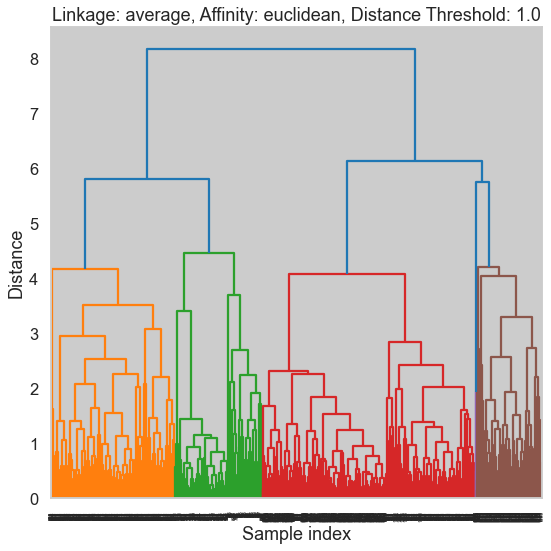

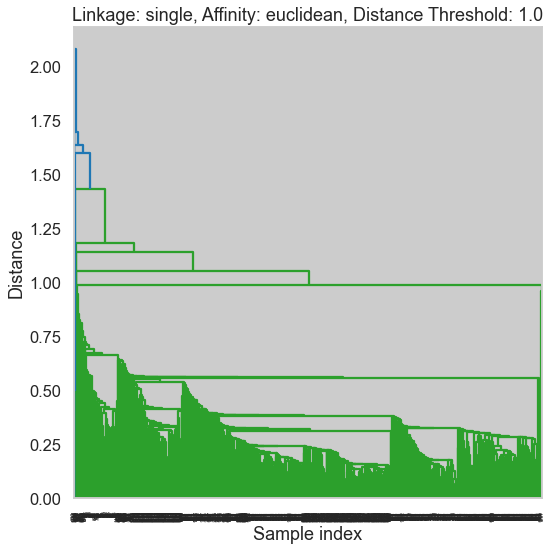

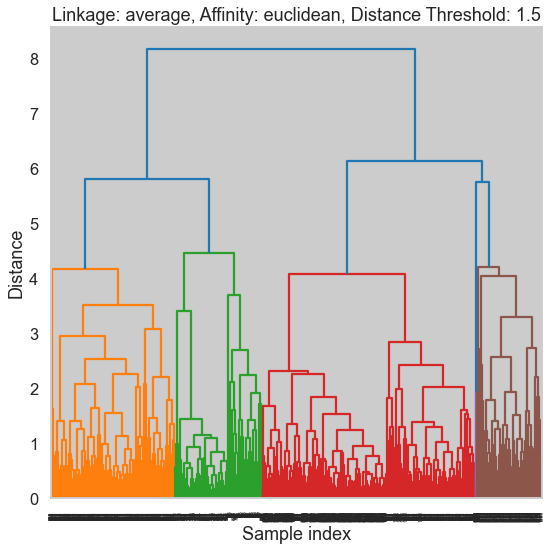

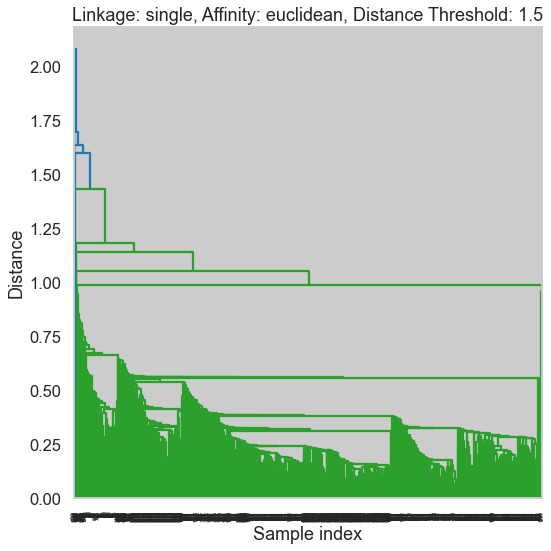

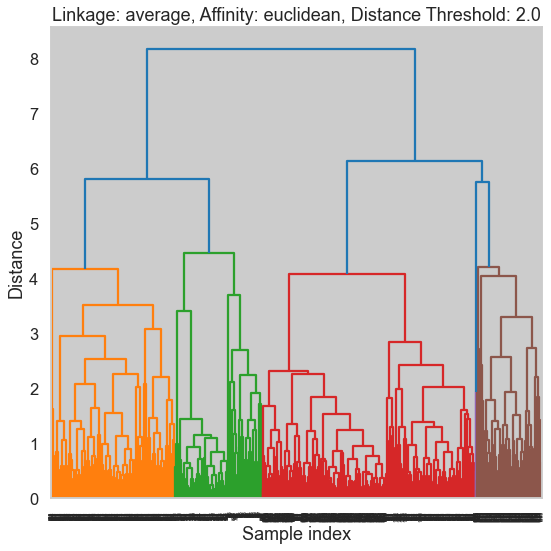

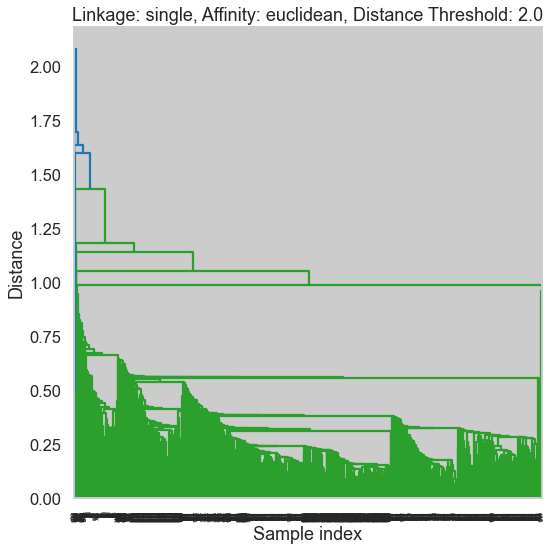

In [10]:
# Loop through parameter grid
for p in ParameterGrid(param_grid):

    # Initialize AgglomerativeClustering object with current parameters
    ac = AgglomerativeClustering(n_clusters=None, **p)

    # Fit model with data
    ac.fit(Multi_blob_Data)

    # Get cluster labels
    labels = ac.labels_

    # Calculate silhouette score
    score = silhouette_score(Multi_blob_Data, labels)

    # Print results for current parameter values
    print(f"Parameters: {p}, Silhouette Score: {score}")

    # Plot dendrogram for current parameter values
    plt.figure()
    dendrogram(linkage(Multi_blob_Data, method=p['linkage'], metric=p['affinity']))
    plt.title(f"Linkage: {p['linkage']}, Affinity: {p['affinity']}, Distance Threshold: {p['distance_threshold']}")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.tight_layout()

    # Update best score and parameters if current score is better
    if score > best_score:
        best_score = score
        best_params = p

# Print the best parameters and score
print("The best parameters are: ", best_params)
print("The best silhouette score is: ", best_score)

Agglomerative Clustering with different parameter values resulted in different silhouette scores and clustering outcomes. 
Changing the affinity, linkage, and distance threshold parameters had a significant impact on the clustering results.
The best parameters for this dataset were found to be {''affinity': 'euclidean', 'distance_threshold': 1.0, 'linkage': 'average'}
The best silhouette score is:  0.32384977908646284. 
This score is not comparable to the best score obtained using K-means clustering. 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(Multi_blob_Data)

In [12]:
#Changing the parameters eps and min_samples:

eps_values = np.linspace(0.1, 3, 30)
min_samples_values = np.arange(5, 26, 2)

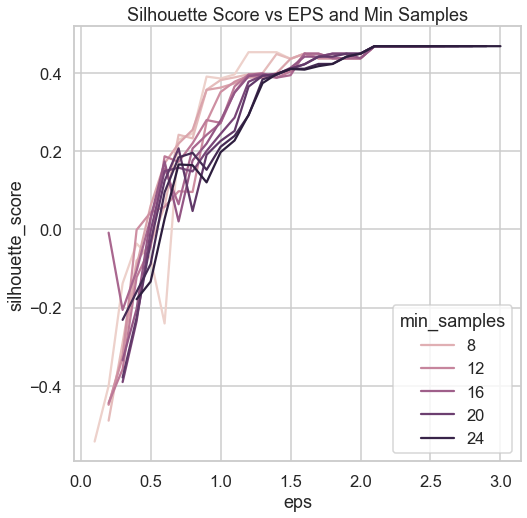

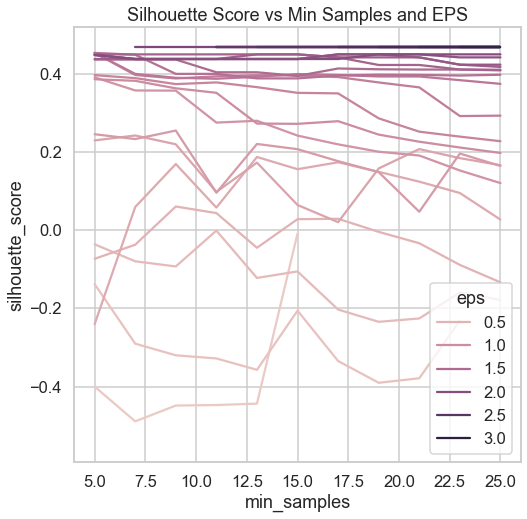

In [13]:
#Plotting the silhouette score versus the variation in the eps and min_samples:

from sklearn.metrics import silhouette_score

silhouette_scores = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(Multi_blob_Data)
        if len(set(labels)) > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            silhouette_scores.append((eps, min_samples, score))

silhouette_scores_df = pd.DataFrame(silhouette_scores, columns=['eps', 'min_samples', 'silhouette_score'])

sns.lineplot(x='eps', y='silhouette_score', hue='min_samples', data=silhouette_scores_df)
plt.title('Silhouette Score vs EPS and Min Samples')
plt.show()

sns.lineplot(x='min_samples', y='silhouette_score', hue='eps', data=silhouette_scores_df)
plt.title('Silhouette Score vs Min Samples and EPS')
plt.show()

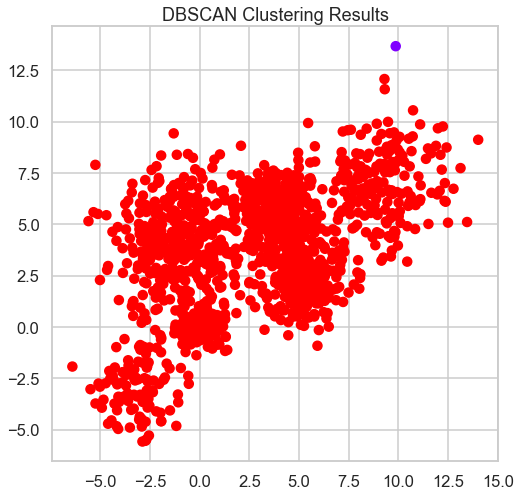

In [14]:
#Plotting the resulting clusters:

plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering Results')
plt.show()


In [15]:
#Finding the set of parameters that result in the best silhouette score:


best_score = -1
best_params = {}
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(Multi_blob_Data)
        if len(set(labels)) > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"The best parameters are: {best_params}")
print(f"The best silhouette score is: {best_score}")

The best parameters are: {'eps': 2.0999999999999996, 'min_samples': 7}
The best silhouette score is: 0.4685207355522043


The silhouette score versus EPS and Min Samples plot shows that higher values of min_samples and lower values of eps tend to result in better silhouette scores.

The DBSCAN algorithm was able to effectively cluster the data into distinct groups, with the number of clusters determined by the parameter values.

The optimal parameters for this dataset were found to be {'eps': 2.0999999999999996, 'min_samples': 7} with a silhouette score of 0.4685207355522043


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

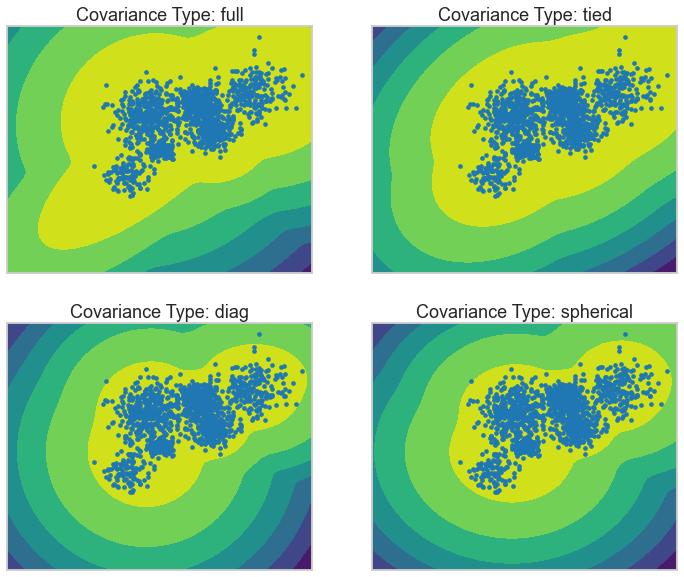

In [16]:
from sklearn.mixture import GaussianMixture


# Fit GMM model with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
models = [GaussianMixture(n_components=6, covariance_type=cov_type, random_state=42).fit(Multi_blob_Data)
          for cov_type in covariance_types]

# Plot contours of the Gaussian mixture models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
x, y = np.meshgrid(np.linspace(-15, 15), np.linspace(-15, 15))
XX = np.array([x.ravel(), y.ravel()]).T

for i, (model, cov_type) in enumerate(zip(models, covariance_types)):
    ax = axs[i//2, i%2]
    Z = -model.score_samples(XX)
    Z = Z.reshape(x.shape)
    ax.contourf(x, y, Z, cmap='viridis_r')
    ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=10)
    ax.set_title(f'Covariance Type: {cov_type}')
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

The contour plots show the probability density functions of the Gaussian mixture models, with darker areas indicating higher probability. 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [17]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [18]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_data.data)
labels = kmeans.labels_
score = silhouette_score(iris_data.data, labels, metric='euclidean')
print(f"KMeans Silhouette Score: {score}")

#Hierarchical

hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier.fit(iris_data.data)
labels = hier.labels_
score = silhouette_score(iris_data.data, labels, metric='euclidean')
print(f"Hierarchical Silhouette Score: {score}")

#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(iris_data.data)
labels = dbscan.labels_
score = silhouette_score(iris_data.data, labels, metric='euclidean')
print(f"DBSCAN Silhouette Score: {score}")

#Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(iris_data.data)
labels = gmm.predict(iris_data.data)
score = silhouette_score(iris_data.data, labels, metric='euclidean')
print(f"GMM Silhouette Score: {score}")

KMeans Silhouette Score: 0.5528190123564094
Hierarchical Silhouette Score: 0.5543236611296417
DBSCAN Silhouette Score: 0.48603419703456857
GMM Silhouette Score: 0.5011761635067206


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_data_norm = scaler.fit_transform(iris_data.data)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_data_norm)
labels = kmeans.labels_
score = silhouette_score(iris_data_norm, labels, metric='euclidean')
print(f"KMeans Silhouette Score (Normalized): {score}")

# Hierarchical
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier.fit(iris_data_norm)
labels = hier.labels_
score = silhouette_score(iris_data_norm, labels, metric='euclidean')
print(f"Hierarchical Silhouette Score (Normalized): {score}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(iris_data_norm)
labels = dbscan.labels_
score = silhouette_score(iris_data_norm, labels, metric='euclidean')
print(f"DBSCAN Silhouette Score (Normalized): {score}")

#Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(iris_data_norm)
labels = gmm.predict(iris_data_norm)
score = silhouette_score(iris_data_norm, labels, metric='euclidean')
print(f"GMM Silhouette Score (Normalized): {score}")

KMeans Silhouette Score (Normalized): 0.45994823920518635
Hierarchical Silhouette Score (Normalized): 0.446689041028591
DBSCAN Silhouette Score (Normalized): 0.3565164814270073
GMM Silhouette Score (Normalized): 0.37416491866541235


* Comparing the results of the clustering approaches on the Iris dataset, we conclude that K-Means and Hierarchical clustering perform the best, followed by GMM  and then DBSCAN.
* When the data is normalized, K-Means and  Hierarchical clustering still perform well, but GMM and DBSCAN have lower silhouette scores. 
* K-Means and Hierarchical clustering are better choices for the Iris dataset due to their high silhouette scores and ability to effectively cluster the data.

## Customer dataset
Repeat all the above on the customer data set 

In [27]:
import pandas as pd 
file_path = '/Users/mohabyasser/Downloads/Assignment1/customerdata.csv'

customer_data = pd.read_csv(file_path)

In [36]:

# Standardize the data
scaler = StandardScaler()
customer_data_norm = scaler.fit_transform(customer_data)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_data_norm)
labels = kmeans.labels_
score = silhouette_score(customer_data_norm, labels, metric='euclidean')
print(f"KMeans Silhouette Score (Normalized): {score}")

# Hierarchical
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier.fit(customer_data_norm)
labels = hier.labels_
score = silhouette_score(customer_data_norm, labels, metric='euclidean')
print(f"Hierarchical Silhouette Score (Normalized): {score}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(customer_data_norm)
labels = dbscan.labels_
score = silhouette_score(customer_data_norm, labels, metric='euclidean')
print(f"DBSCAN Silhouette Score (Normalized): {score}")

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(customer_data_norm)
labels = gmm.predict(customer_data_norm)
score = silhouette_score(customer_data_norm, labels, metric='euclidean')
print(f"GMM Silhouette Score (Normalized): {score}")

KMeans Silhouette Score (Normalized): 0.24436844393676221
Hierarchical Silhouette Score (Normalized): 0.18063421720096534
DBSCAN Silhouette Score (Normalized): 0.09613494822404081
GMM Silhouette Score (Normalized): 0.1516343837348934
